# Decision Tree













Desicion Tree!

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems.
Decision Tree uses a flowchart like a tree structure to show the predictions that result from a series of feature-based splits. It starts with a root node and ends with a decision made by leaves.


What is Decision Tree ?

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.
A path from root to leaf represent  classification rules.

# What is Decision Tree ?

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.
A path from root to leaf represent  classification rules.


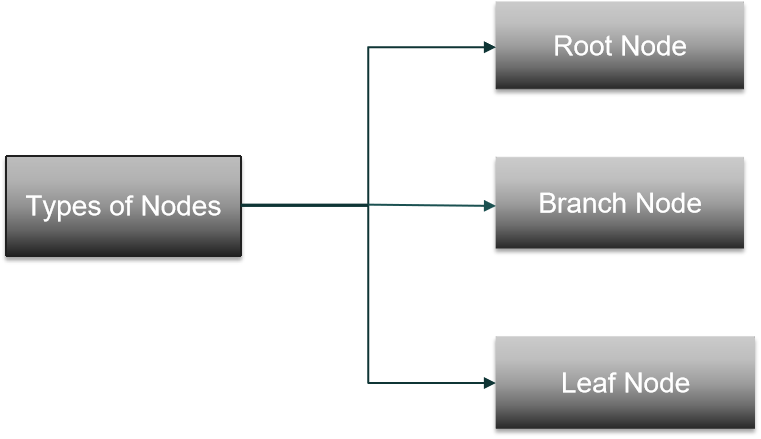

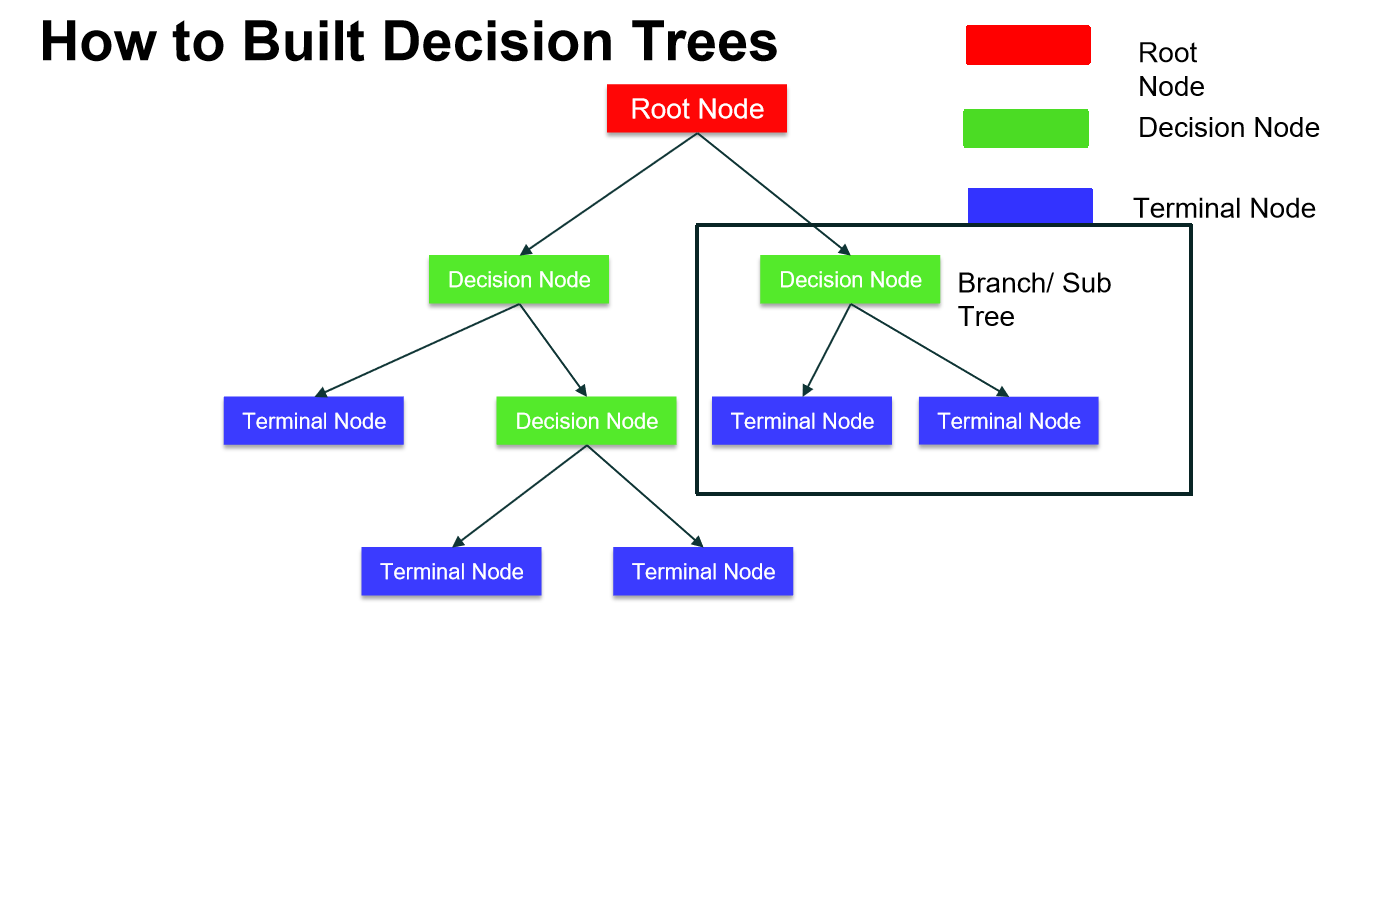

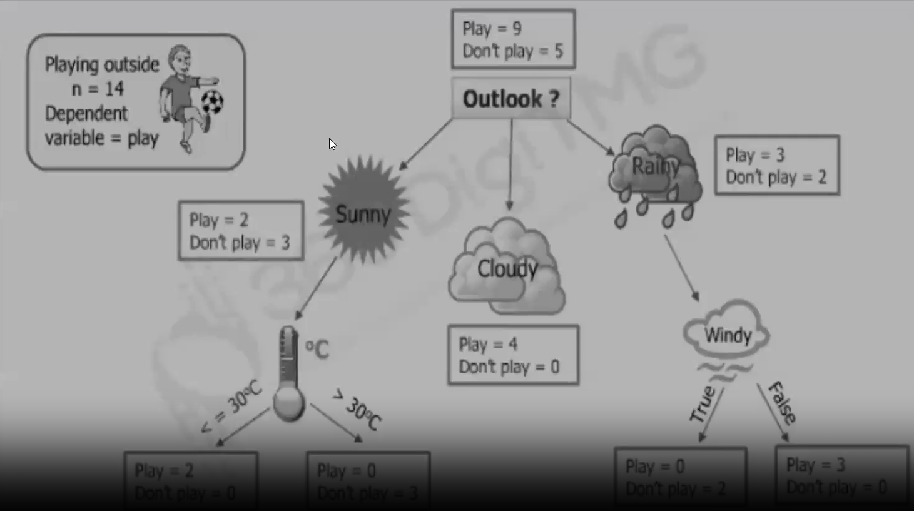

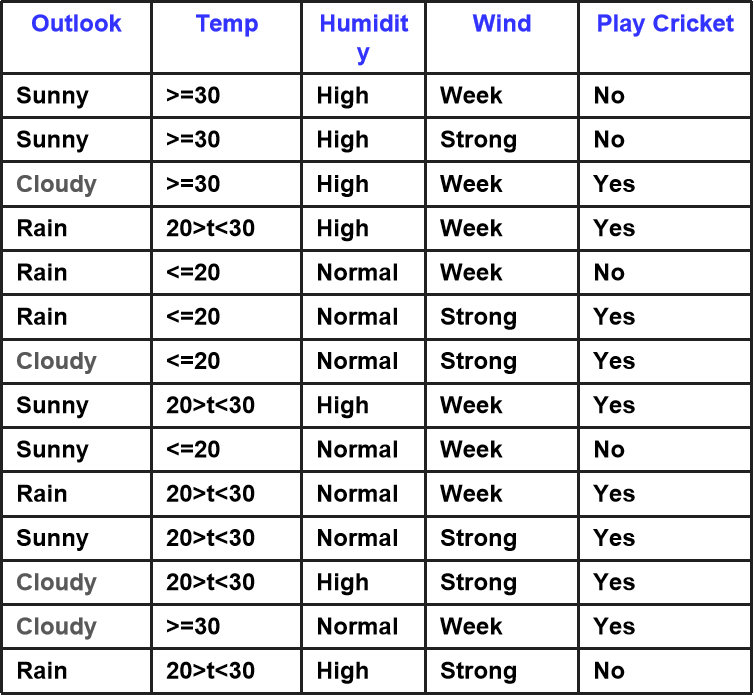

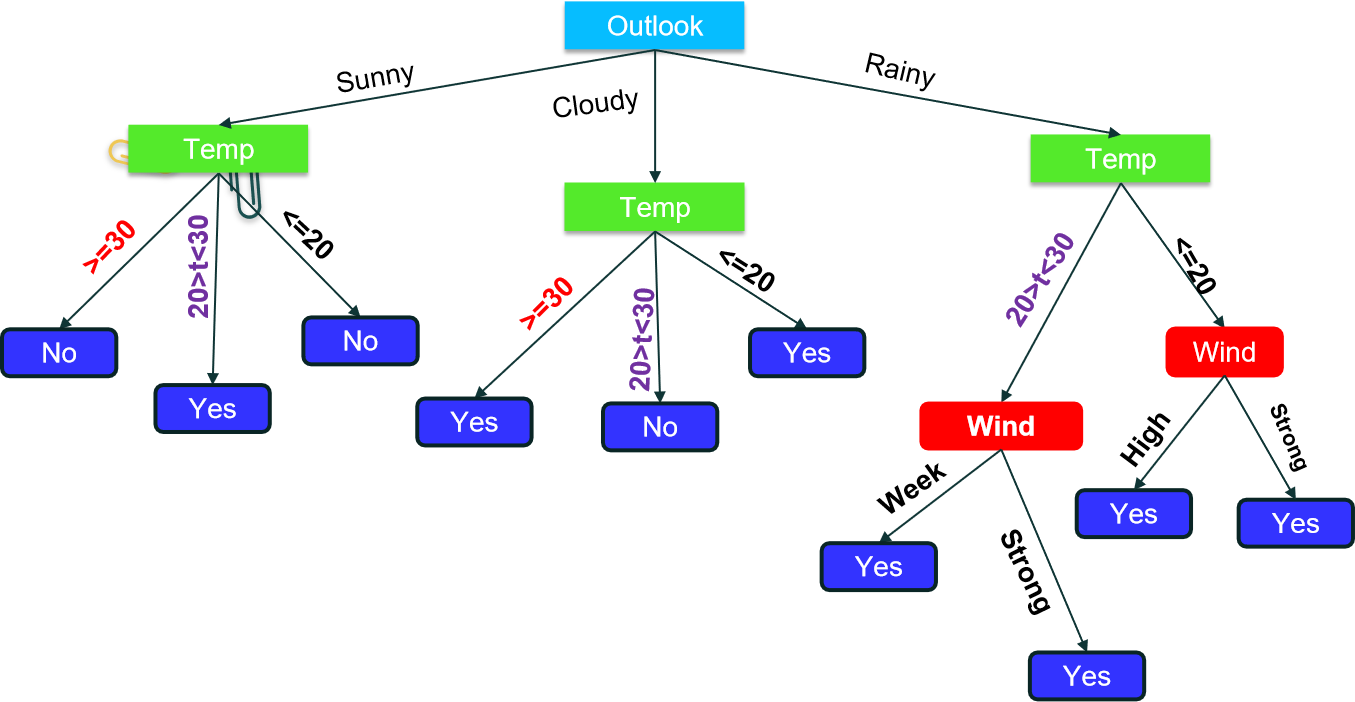

Decision trees have many techniques like ID3, C4.5, CART.
Each of the methods tries to separate data with more information gain

CART - Use GINI Impurity
ID3 - use Entropy and Information gain
C4.5 - use split info ands gain ration

In [3]:
#MSE - mean square error
#MAE mean absolute error

In [1]:
# import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("credit.csv")
data

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


In [9]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [13]:
data.tail()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes
999,1 - 200 DM,45,critical,car,4576,100 - 500 DM,unemployed,3,4,27,none,own,1,skilled,1,no,no


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [17]:
data.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [19]:
data.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [27]:
data.dropna()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 DM,4 - 7 years,3,4,31,none,own,1,unskilled,1,no
996,< 0 DM,30,good,car,3857,< 100 DM,1 - 4 years,4,4,40,none,own,1,management,1,no
997,unknown,12,good,furniture/appliances,804,< 100 DM,> 7 years,4,4,38,none,own,1,skilled,1,no
998,< 0 DM,45,good,furniture/appliances,1845,< 100 DM,1 - 4 years,4,4,23,none,other,1,skilled,1,yes


In [23]:
data.columns
data = data.drop(["phone"], axis = 1)

In [25]:
data['purpose'].value_counts()

purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64

In [31]:
#converting into binary
lb = LabelEncoder()
data["checking_balance"] = lb.fit_transform(data["checking_balance"])
data["credit_history"] = lb.fit_transform(data["credit_history"])
data["purpose"] = lb.fit_transform(data["purpose"])
data["savings_balance"] = lb.fit_transform(data["savings_balance"])
data["employment_duration"] = lb.fit_transform(data["employment_duration"])
data["other_credit"] = lb.fit_transform(data["other_credit"])
data["housing"] = lb.fit_transform(data["housing"])
data["job"] = lb.fit_transform(data["job"])
data["default"]=lb.fit_transform(data["default"])


In [33]:
data

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,default
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1,0
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1,1
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2,0
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2,0
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,1,4,1736,2,1,3,4,31,1,1,1,3,1,0
996,1,30,1,1,3857,2,0,4,4,40,1,1,1,0,1,0
997,3,12,1,4,804,2,3,4,4,38,1,1,1,1,1,0
998,1,45,1,4,1845,2,0,4,4,23,1,0,1,1,1,1


In [35]:
data['default'].unique()

array([0, 1])

In [37]:
data['purpose'].value_counts()

purpose
4    473
1    337
0     97
3     59
5     22
2     12
Name: count, dtype: int64

In [39]:
colnames = list(data.columns)
colnames

['checking_balance',
 'months_loan_duration',
 'credit_history',
 'purpose',
 'amount',
 'savings_balance',
 'employment_duration',
 'percent_of_income',
 'years_at_residence',
 'age',
 'other_credit',
 'housing',
 'existing_loans_count',
 'job',
 'dependents',
 'default']

In [41]:
predictors = colnames[:15]
target = colnames[15]

In [43]:
# Input and Output Split
predictors = data.iloc[:,:15]
target = data["default"]

In [45]:
predictors

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents
0,1,6,0,4,1169,4,3,4,4,67,1,1,2,1,1
1,0,48,1,4,5951,2,0,2,2,22,1,1,1,1,1
2,3,12,0,3,2096,2,1,2,3,49,1,1,1,3,2
3,1,42,1,4,7882,2,1,2,4,45,1,0,1,1,2
4,1,24,3,1,4870,2,0,3,4,53,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,1,4,1736,2,1,3,4,31,1,1,1,3,1
996,1,30,1,1,3857,2,0,4,4,40,1,1,1,0,1
997,3,12,1,4,804,2,3,4,4,38,1,1,1,1,1
998,1,45,1,4,1845,2,0,4,4,23,1,0,1,1,1


In [47]:
predictors.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int32
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int32
 3   purpose               1000 non-null   int32
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int32
 6   employment_duration   1000 non-null   int32
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int32
 11  housing               1000 non-null   int32
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int32
 14  dependents            1000 non-null   int64
dtypes: int32(8), int64(7)
memory usage: 86.1 KB


In [49]:
target = target.astype('int64')

In [39]:


colnames

['checking_balance',
 'months_loan_duration',
 'credit_history',
 'purpose',
 'amount',
 'savings_balance',
 'employment_duration',
 'percent_of_income',
 'years_at_residence',
 'age',
 'other_credit',
 'housing',
 'existing_loans_count',
 'job',
 'dependents',
 'default']

In [51]:
import numpy as np

def convert_to_int64(df, x):
    for i in x:
        df[i] = df[i].astype(np.int64)
    return df

"""
  Converts a specified column in a Pandas DataFrame to int64.

  Args:
    df: The Pandas DataFrame.
    column_name: The name of the column to convert.

  Returns:
    The modified Pandas DataFrame with the specified column converted to int64.
  """


'\n  Converts a specified column in a Pandas DataFrame to int64.\n\n  Args:\n    df: The Pandas DataFrame.\n    column_name: The name of the column to convert.\n\n  Returns:\n    The modified Pandas DataFrame with the specified column converted to int64.\n  '

In [55]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   checking_balance      1000 non-null   int32
 1   months_loan_duration  1000 non-null   int64
 2   credit_history        1000 non-null   int32
 3   purpose               1000 non-null   int32
 4   amount                1000 non-null   int64
 5   savings_balance       1000 non-null   int32
 6   employment_duration   1000 non-null   int32
 7   percent_of_income     1000 non-null   int64
 8   years_at_residence    1000 non-null   int64
 9   age                   1000 non-null   int64
 10  other_credit          1000 non-null   int32
 11  housing               1000 non-null   int32
 12  existing_loans_count  1000 non-null   int64
 13  job                   1000 non-null   int32
 14  dependents            1000 non-null   int64
dtypes: int32(8), int64(7)
memory usage: 86.1 KB


In [57]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.30, random_state=0)

In [59]:
from sklearn.tree import DecisionTreeClassifier as DT

In [61]:
help(DT)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree classifier.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies ar

In [63]:
model = DT(criterion = 'entropy') # 
model.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy')

In [65]:
# Prediction on Test Data
preds = model.predict(x_test)
preds


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1], d

In [ ]:
pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predictions'])

In [167]:
np.mean(preds == y_test) # Test Data Accuracy 


ValueError: ('Lengths must match to compare', (300,), (700,))

In [147]:
# Prediction on Train Data
preds = model.predict(x_train)
pd.crosstab(y_train, preds, rownames = ['Actual'], colnames = ['Predictions'])


Predictions,0,1
Actual,,
0,486,0
1,0,214


In [152]:
np.mean(preds == y_train)
# Train Data Accuracy


1.0